Data Science Summer School - Split '16
======================================

Day 3 - part 2 - Dimensionality reduction
--------------------------------

Matija Piškorec

v0.0.2

`kernel: Python 2.7`

Prerequisites
--------------

We will use [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) package for some of the plots and for visual style of Matplotlib's plots. If it is not already installed in your Anaconda distribution you can install it by `conda install seaborn` in Anaconda console. For more details see documentation for [`conda install`](http://conda.pydata.org/docs/commands/conda-install.html).

We will use the "Wisconsin Breast Cancer" dataset which is available locally in this notebook's folder. In general, this dataset is also available in scikit-learn (version 0.17.1), and you can load it with:

```python
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
```

And convert it to Pandas dataframe:

```Python
breast_cancer = pd.DataFrame(data=np.c_[breast_cancer['data'], breast_cancer['target']], 
                             columns=np.append(breast_cancer['feature_names'],'target'))
```

For other datasets available in scikit-learn see the documentation for [`sklearn.datasets`](http://scikit-learn.org/dev/modules/classes.html#module-sklearn.datasets).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
breast_cancer = pd.read_csv('breast_cancer.csv',index_col=0)
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

Although it is not strictly necessary in our case, we will follow a standard machine learning procedure and split our dataset into training and test set with [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html), and perform all our analysis on the train set only.

In [4]:
from sklearn.cross_validation import train_test_split

In [5]:
breast_cancer_train, breast_cancer_test = train_test_split(breast_cancer, test_size=0.20, random_state=42)
print 'Number of training examples: ' + str(len(breast_cancer_train))
print 'Number of test examples: ' + str(len(breast_cancer_test))

Number of training examples: 455
Number of test examples: 114


1. Dimensionality reduction
---------------------------

The main goal of dimenisonality reduction is to project our data a different feature space, usually because this new feature space has some beneficial mathematical properties. For example, principal component analysis (PCA) makes a liner projection of data where new features ("components") are ordered by the amount of variance in data they explain. This way we can easily perform dimensionality reduction by considering just the first few components. Technically, this is very similar to feature selection, with the difference that we are selecting transformed features.

Official scikit-learn documentation and [user guide](http://scikit-learn.org/stable/user_guide.html) has several examples on PCA and other dimensionality reduction methods [[1]](#scikit-decomposition), and there are many useful notebooks available freely on Github [[2]](#islr-ch10),[[3]](pyml-ch5),[[4]](#sklearn_pycon2015).

1.1. Exploratory data analysis of breast cancer dataset
----------------------------------------------------------

Before we transform our dataset into a new feature space and perform dimensionality reduction there, let us first analyse it as it is by drawing histograms for individual features and coloring it by target variable. For a similar example, see Chapter 3 of the book "Introduction to Machine Learning with Python" [[5]](#intro-ml-py).

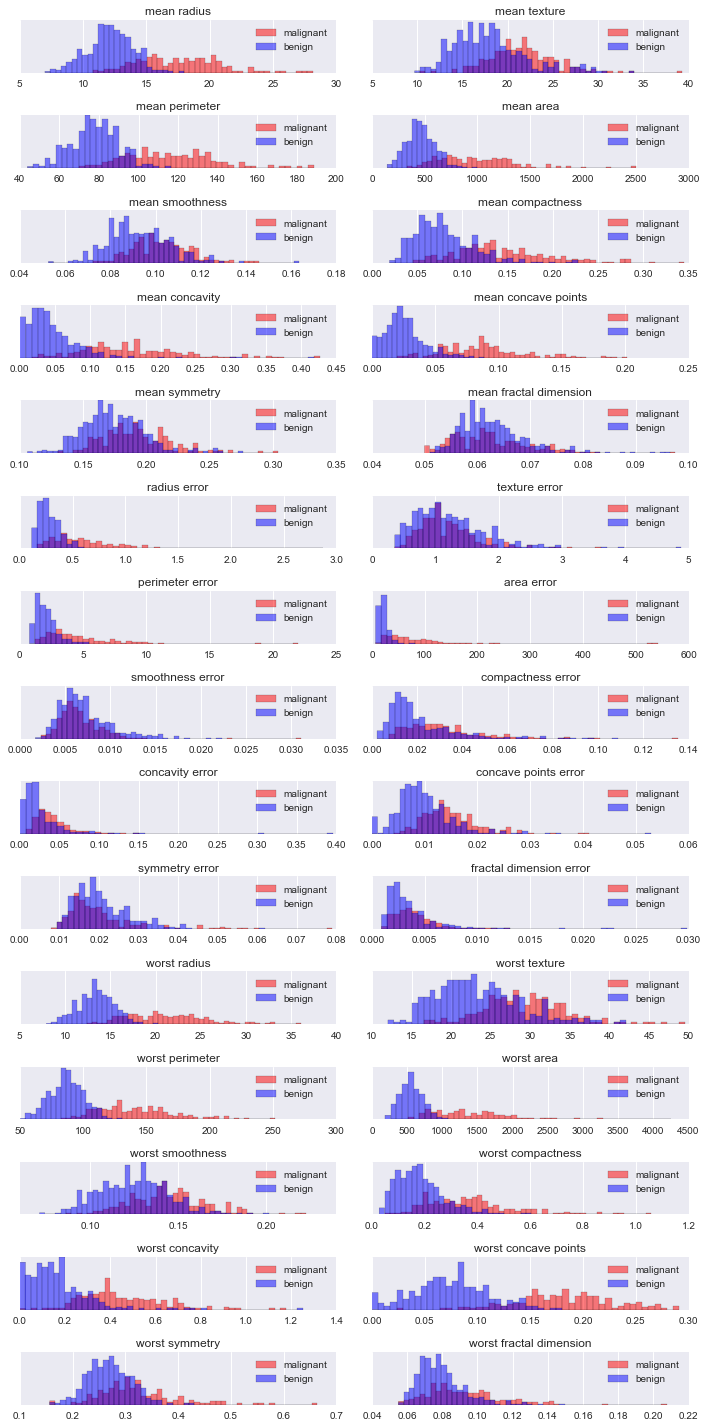

In [6]:
breast_cancer = pd.read_csv('breast_cancer.csv',index_col=0)

malignant = breast_cancer.loc[ breast_cancer['target'] == 0, : ]
benign = breast_cancer.loc[ breast_cancer['target'] == 1, : ]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(breast_cancer.iloc[:,i], bins=50)
    ax[i].hist(malignant.iloc[:,i], bins=bins, color='r', alpha=.5, label='malignant')
    ax[i].hist(benign.iloc[:,i], bins=bins, color='b', alpha=.5, label='benign')
    ax[i].set_title(breast_cancer.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

Ideally, we would like our two classes (malignant and benign) to completelly separate on at least one feature. In that case our predictive model would be really simple - just observe whether a value of this (one!) feature is above or bellow some threshold value. But we are out of luck, and will have to keep digging. 

**Exercise 1.1.** Which features seem correlated? Confirm this by calculating complete correlation matrix with [`pandas.DataFrame.corr`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) and plotting it with [`matplotlib.pyplot.imshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow).

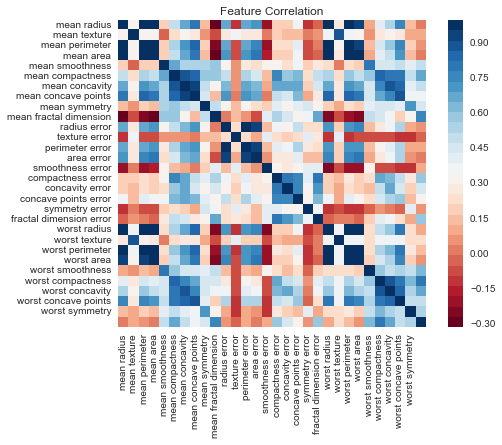

In [29]:
from matplotlib import cm as cm
X_corr = breast_cancer.drop('target',axis=1).corr()
cmap = cm.get_cmap('RdBu', 30)
cax = plt.imshow(X_corr, interpolation="nearest", cmap=cmap)
plt.grid(False)
plt.title('Feature Correlation')
plt.xticks(range(X_corr.shape[1]),breast_cancer.drop('target',axis=1).columns.values[:-1], rotation=90)
plt.yticks(range(X_corr.shape[1]),breast_cancer.drop('target',axis=1).columns.values[:-1])
cbar = plt.colorbar(cax)
plt.show()

**Exercise 1.2.** Another way to effectivelly visualize correlations between variables is by plotting scatter plot for each pair of features. Choose several features, with at least one pair with high positive correlation, one pair with large negative correlation, and one pair with low correlation, and plot multiple scatter plots with Seaborn's [`seaborn.pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html). Is there a pair of features which in combination yield good linear separation, corresponding to a simple linear predictive model?

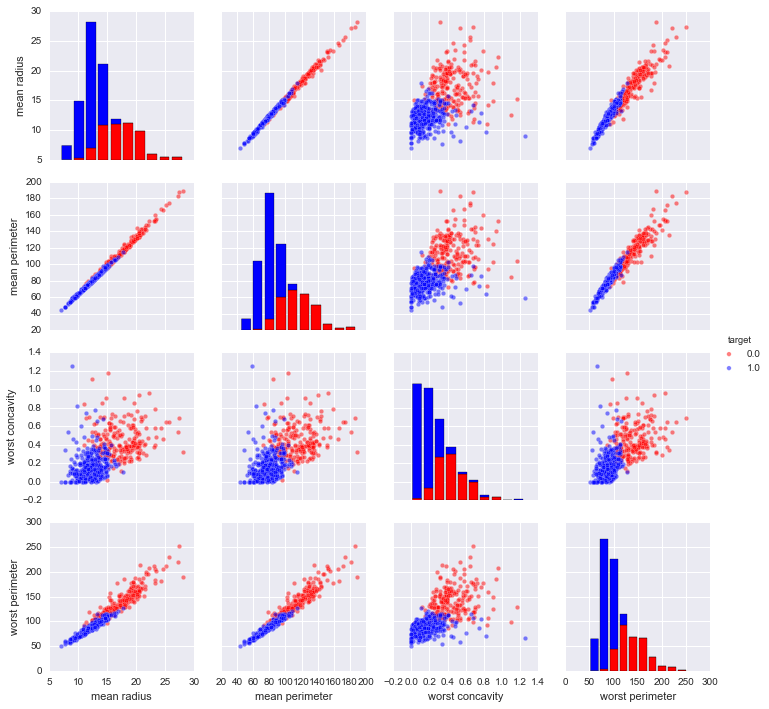

In [14]:
selected_columns = ['mean radius','mean perimeter','worst concavity','worst perimeter']
sns.pairplot(breast_cancer, vars=selected_columns, hue="target", 
             size=2.5, plot_kws={'alpha':0.5}, palette={0.0:'red',1.0:'blue'})

1.2. Principal component analysis (PCA)
-----------------------------

As we can see from exploratory analysis, many features are correlated, which means we can lineary project our data to a more efficient feature space where features will be ordered by the amount of variance they explain. A principled (no pun intended) way of doing this is with principal component analysis (PCA).

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
scaler = StandardScaler()
X = breast_cancer.drop('target',axis=1)
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA() # use option n_components=2 to calculate just first two principal components
pca.fit(X_scaled) # fit PCA model to breast cancer data
X_pca = pca.transform(X_scaled) # transform data onto the principal components
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 30)


Oh no, our data is of the same dimensionality as the original data! What happened? By definition, PCA transforms our data onto the space of the same dimensionality. But the dimensions, or the *principal components*, are now arranged in order of the variance they explain, from largest to the smallest. This is how our transformed dataset looks like:

In [32]:
breast_cancer_pca = pd.DataFrame(X_pca, columns=['PC'+str(i) for i in range(1,X_pca.shape[1]+1)])
breast_cancer_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-9.192837,-1.948583,-1.123166,3.633731,1.195110,1.411424,2.159370,0.398407,-0.157118,-0.877402,...,0.096515,-0.068850,0.084519,0.175256,0.151020,-0.201503,-0.252585,-0.033914,0.045648,0.047169
1,-2.387802,3.768172,-0.529293,1.118264,-0.621775,0.028656,0.013358,-0.240988,-0.711905,1.106995,...,-0.077327,0.094578,-0.217718,-0.011290,0.170510,-0.041129,0.181270,0.032624,-0.005687,0.001868
2,-5.733896,1.075174,-0.551748,0.912083,0.177086,0.541452,-0.668166,-0.097374,0.024066,0.454275,...,0.311067,0.060309,-0.074291,-0.102762,-0.171158,0.004735,0.049569,0.047026,0.003146,-0.000751
3,-7.122953,-10.275589,-3.232790,0.152547,2.960878,3.053422,1.429911,-1.059565,-1.405440,-1.116975,...,0.434193,0.203266,-0.124105,-0.153430,-0.077496,-0.275225,0.183462,0.042484,-0.069295,0.019937
4,-3.935302,1.948072,1.389767,2.940639,-0.546747,-1.226495,-0.936213,-0.636376,-0.263805,0.377704,...,-0.116545,0.017650,0.139454,0.005332,-0.003062,0.039254,0.032168,-0.034786,0.005038,-0.021214


**Exercise 1.3.** Calculate complete correlation matrix for principal components in our new dataset. Is there any difference in comparison to the correlation matrix of the original dataset?

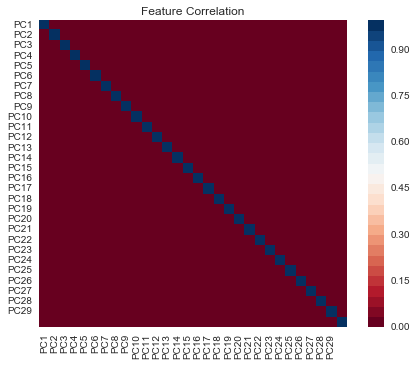

In [33]:
from matplotlib import cm as cm
X_corr = breast_cancer_pca.corr()
cmap = cm.get_cmap('RdBu', 30)
cax = plt.imshow(X_corr, interpolation="nearest", cmap=cmap)
plt.grid(False)
plt.title('Feature Correlation')
plt.xticks(range(X_corr.shape[1]),breast_cancer_pca.columns.values[:-1], rotation=90)
plt.yticks(range(X_corr.shape[1]),breast_cancer_pca.columns.values[:-1])
cbar = plt.colorbar(cax)
plt.show()

We can plot the amount of variance explained by each principal component, as well as the cumulative variance explained by including each successive principal component into our transformed dataset.

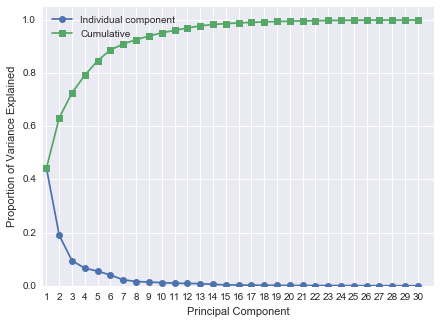

In [37]:
plt.figure(figsize=(7,5)); sns.set();

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cummulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,X_pca.shape[1]+1), explained_variance_ratio, '-o', label='Individual component')
plt.plot(range(1,X_pca.shape[1]+1), explained_variance_ratio_cummulative, '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,X_pca.shape[1]+1.25)
plt.ylim(0,1.05)
plt.xticks(range(1,X_pca.shape[1]+1))
plt.legend(loc=2)

We observe that first two components explain more than 60% of the variance in the data, and first ten more than 95%. This is a significant reduction from the 30 features we have in the original dataset. Lets see how does our data look like when transformed onto the first two principal components. 

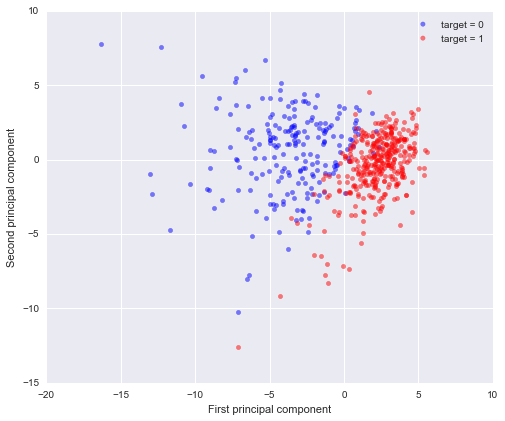

In [39]:
plt.figure(figsize=(8, 8))
plt.scatter(breast_cancer_pca.loc[breast_cancer.loc[:,'target']==0,'PC1'], 
            breast_cancer_pca.loc[breast_cancer.loc[:,'target']==0,'PC2'], 
            color='blue', alpha=0.5, label='target = 0')
plt.scatter(breast_cancer_pca.loc[breast_cancer.loc[:,'target']==1,'PC1'], 
            breast_cancer_pca.loc[breast_cancer.loc[:,'target']==1,'PC2'], 
            color='red', alpha=0.5, label='target = 1')
plt.gca().set_aspect("equal")
plt.legend()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In case of large datasets we can use [`sklearn.decomposition.RandomizedPCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.RandomizedPCA.html#sklearn.decomposition.RandomizedPCA) which provides approximation to the PCA.

**Exercise 1.4.** Looking at the pairplot of original dataset above, which features seem more or less correlated? As an example, construct two datasets - one containing only two very correlated features and the other containing only two less correlated features. Perform PCA analysis of these two datasets and compare variances explained by each of the components. Which dataset has more variance explained by first principle component and why?

In [22]:
breast_cancer_correlated = breast_cancer[['mean radius','mean perimeter']]
breast_cancer_uncorrelated = breast_cancer[['mean radius','worst concavity']]

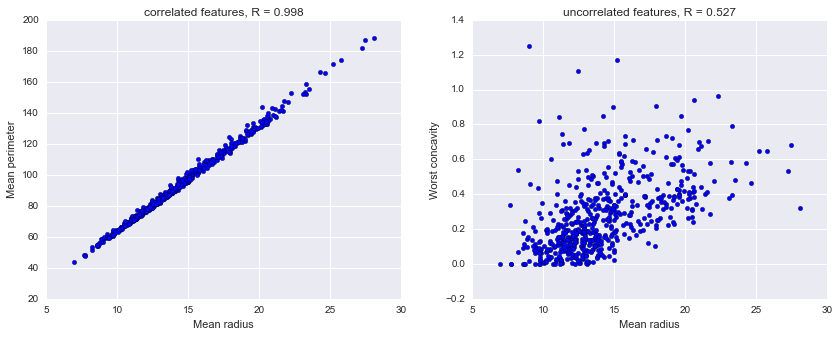

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

R1 = breast_cancer_correlated.corr().loc['mean radius','mean perimeter']
R2 = breast_cancer_uncorrelated.corr().loc['mean radius','worst concavity']

ax[0].scatter(breast_cancer_correlated['mean radius'],breast_cancer_correlated['mean perimeter'])
ax[0].set(xlabel='Mean radius',ylabel='Mean perimeter',title='correlated features, R = ' + '{0:.3f}'.format(R1))

ax[1].scatter(breast_cancer_uncorrelated['mean radius'],breast_cancer_uncorrelated['worst concavity'])
ax[1].set(xlabel='Mean radius',ylabel='Worst concavity',title='uncorrelated features, R = ' + '{0:.3f}'.format(R2))

plt.show()

In [49]:
X_scaled_correlated = StandardScaler().fit(breast_cancer_correlated).transform(breast_cancer_correlated)
variance_correlated = PCA().fit(X_scaled_correlated).explained_variance_ratio_

X_scaled_uncorrelated = StandardScaler().fit(breast_cancer_uncorrelated).transform(breast_cancer_uncorrelated)
variance_uncorrelated = PCA().fit(X_scaled_uncorrelated).explained_variance_ratio_

print 'Variance correlated, PC1 = ' + str(variance_correlated[0]) + ', PC2 = ' + str(variance_correlated[1])
print 'Variance uncorrelated, PC1 = ' + str(variance_uncorrelated[0]) + ', PC2 = ' + str(variance_uncorrelated[1])

Variance correlated, PC1 = 0.998927640747, PC2 = 0.00107235925309
Variance uncorrelated, PC1 = 0.763455730919, PC2 = 0.236544269081


With correlated features more of the variance is explained in first principal component.

1.3. Predictive modeling after PCA transform
----------------------------------------------

Although PCA analysis can be useful on its own, we are mostly interested in whether it can help us in predictive modeling, as performing classification on a reduced dataset is more efficient in both time and memory. In the example below we will use logistic regression, implemented in [`sklearn.linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), We will evaluate accuracy of our predictions with 10-fold cross validation implemented in [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV) for different number of principle components. Finally, we will evaluate best-performing cross-validation model on a separate test set. To simplify prediction workflow we will use pipelines implemented in [`sklearn.pipeline.Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Besides enhancing readability of code, pipelines guarantie that all preprocessing steps performed on a train set are also performed on a test set. For a similar example see ["Pipelining: chaining a PCA and a logistic regression"](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html), 

As there are approximatelly equal number of malignant and benign examples in our dataset (check with `breast_cancer['target'].value_counts()`) we can use accuracy measure to evaluate our predictions [`sklearn.metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [23]:
breast_cancer = pd.read_csv('breast_cancer.csv',index_col=0)
breast_cancer_train, breast_cancer_test = train_test_split(breast_cancer, test_size=0.30, random_state=42)

X_train = breast_cancer_train.drop('target',axis=1)
y_train = breast_cancer_train['target']

X_test = breast_cancer_test.drop('target',axis=1)
y_test = breast_cancer_test['target']

In [24]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('pca', PCA()),
                       ('logistic',LogisticRegression())])

components_to_evaluate = 15

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=range(1,components_to_evaluate)),
                         cv=10,
                         scoring='accuracy')

model = estimator.fit(X_train, y_train)

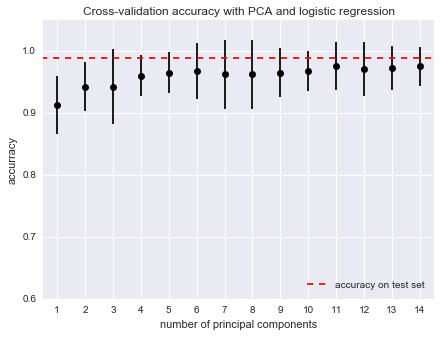

In [25]:
plt.figure(figsize=(7,5))

for params, mean_score, scores in model.grid_scores_:  
    plt.errorbar(params['pca__n_components'], mean_score, yerr=scores.std() * 2, fmt='ok')

plt.hlines(accuracy_score(y_test, model.predict(X_test)), 0, 15, color='red', linestyle='--',label='accuracy on test set')

plt.ylabel('accurracy')
plt.xlabel('number of principal components')
plt.title('Cross-validation accuracy with PCA and logistic regression')
plt.xlim(0.5,components_to_evaluate-0.5)
plt.ylim(0.6,1.05)
plt.xticks(range(1,components_to_evaluate))
plt.legend(loc='lower right')
plt.show()

1.4. Topic modeling with non-negative matrix factorization (NMF)
-----------------------------------------

In the following example we will use non-negative matrix factorization (NMF) for topic modeling in textual documents. NMF assumes that data is non-negative and produces additive components which are easier to interpret in domains such as images or text. In topic modeling, where each document is represented with a bag-of-words representation, components produced with non-negative decomposition such as NMF are interpreted as topics which underlie given documents and which make certain terms more likely to appear. For more details see ["2.5.6. Non-negative matrix factorization (NMF or NNMF)"](http://scikit-learn.org/stable/modules/decomposition.html#nmf) in scikit's user guide. 

We will use [`sklearn.datasets.fetch_20newsgroups`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups) dataset consisting of documents which belong to several distinct topics. For a similar example see ["Topics extraction with NMF"](http://scikit-learn.org/0.16/auto_examples/applications/topics_extraction_with_nmf.html) in scikit-learn user guide.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

In [27]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             data_home='.',
                             download_if_missing=False) # dataset is available locally

print 'Loaded ' + str(len(dataset.data)) + ' documents.'

Loaded 11314 documents.


Lets see how first few newsgroup entries look like, along with the topics.

In [28]:
[t.upper()+' => '+s[:300]+'[...]' for s,t in zip(dataset.data[:5],np.take(dataset.target_names,dataset.target[:5]))]

[u"TALK.POLITICS.MIDEAST => Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one desc[...]",
 u"ALT.ATHEISM => \n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  O[...]",
 u'TALK.POLITICS.MIDEAST => Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have 

And all possible topics are:

In [29]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We already stripped the posts of headers, footers and quoted replies. We will use [`sklearn.feature_extraction.text.TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create TF-IDF (term frequency - inverse document frequency) vector for each document. Here, each feature corresponds to one of the terms we are tracking in documents, and the value of each feature is proportional to term frequency in that document and inversely proportional to the term frequency in the whole corpus. In other words, terms that are rare carry proportionally more weight, as it is likely that they are specific to the topic of the document. We also remove words occurring in only one document (`min_df=2`) or in more than 95% of the documents (`max_df=0.95`), as well as stop words - prespecified words that do not carry much semantic meaning (`stop_words='english'`). Given these criteria, our features are top 1000 most frequent terms in our documents (`max_featuers=1000`).

In [30]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 15

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tfidf = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf

<2000x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 51752 stored elements in Compressed Sparse Row format>

As we can see our dataset is a sparse matrix where features are our 1000 chosen terms and examples are individual documents. Finally, lets perform NMF on the given TF-IDF representation, using [`sklearn.decomposition.NMF`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF).

In [31]:
print 'Fitting the NMF model with ' + str(n_samples) + ' samples and ' + str(n_features) + ' features.'
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print "Topic #%d:" % topic_idx + ' ' + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

Fitting the NMF model with 2000 samples and 1000 features.
Topic #0: just don like think know ve sure got really ll way thought look good use
Topic #1: windows file dos using use program window files problem help os application running drivers version
Topic #2: god jesus bible does faith christian christians christ believe life heaven sin lord church religion
Topic #3: key chip clipper keys encryption government use public secure phone enforcement nsa data doesn communications
Topic #4: thanks edu know mail does advance info email interested hi send com anybody information list
Topic #5: drive drives hard card disk software floppy mac pc power apple scsi controller problem board
Topic #6: 00 space 10 new sale 12 15 years 11 nasa computer 16 20 earth data
Topic #7: game team year games win play season players nhl runs toronto division hockey flyers won
Topic #8: car bike good cars engine power tires miles insurance new speed oil buy year used
Topic #9: people did law government israel t

**Exercise 1.5.** Use some other dimensionality reduction technique for topic modeling on the given dataset. For example, you can use truncated singular value composition implemented in [`sklearn.decomposition.TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (this is known as *latent semantic analysis*) or even principal component analysis, implemented in [`sklearn.decomposition.PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Or any other decomposition methods in [`sklearn.decomposition`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition). Compare the results with the NMF - are topics meaningful? Note: Some of the methods, like PCA, operate only on dense matrices, so you will have to convert the sparse matrix to dense with `tfidf.todense()`. Tfidf vector representations produced by [`sklearn.feature_extraction.text.TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) are sparse.

In [32]:
from sklearn.decomposition import TruncatedSVD

In [33]:
print 'Fitting the truncated SVD model with ' + str(n_samples) + ' samples and ' + str(n_features) + ' features.'
nmf = TruncatedSVD(n_components=n_topics).fit(tfidf)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print "Topic #%d:" % topic_idx + ' ' + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

Fitting the truncated SVD model with 2000 samples and 1000 features.
Topic #0: just like don know people think does good use time new god way ve want
Topic #1: god people think just jesus don bible say law did government life believe christian faith
Topic #2: god does thanks jesus know bible windows faith christian file mail christians edu advance christ
Topic #3: edu thanks game know mail interested bike car team games like new email send year
Topic #4: god drive game year windows 10 00 new team car power software card jesus disk
Topic #5: edu god 00 com key soon government university chip computer sale information 10 new space
Topic #6: edu file think windows program files game soon win ftp team dos play pub window
Topic #7: game team key does games chip year play looking thanks government clipper encryption time keys
Topic #8: drive think people card drives software disk hard don mac floppy thanks chip computer apple
Topic #9: edu key chip god game use clipper good just keys drive t

In [34]:
from sklearn.decomposition import PCA

In [35]:
print 'Fitting the PCA model with ' + str(n_samples) + ' samples and ' + str(n_features) + ' features.'
nmf = PCA(n_components=n_topics).fit(tfidf.todense()) # PCA works only on dense matrices!

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print "Topic #%d:" % topic_idx + ' ' + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

Fitting the PCA model with 2000 samples and 1000 features.
Topic #0: people god think just don say government law like did jesus bible make way believe
Topic #1: god does jesus bible edu thanks faith christian christians christ mail heaven true lord church
Topic #2: game year 00 team edu 10 games sale season flyers condition players nhl 12 000
Topic #3: thanks know edu mail like don does game interested advance just bike car info email
Topic #4: game windows god drive year just team like win ve games good think car season
Topic #5: file edu think windows game win files program team ftp play window games soon dos
Topic #6: edu drive just car soon god think don good need com 00 mac power university
Topic #7: drive think game drives card people hard disk chip software don team games mac edu
Topic #8: people israel drive think evidence true file problem don book drives jews rights israeli killed
Topic #9: just drive use does chip bike key thought doesn don sure got try mean wrong


**Exercise 1.6.** Set up a pipeline for evaluating predictive performance after applying NMF transformation, similar as we did in section "1.3. Predictive modeling after PCA transform". Note that here, as compared to the breast cancer dataset, you have a multiclass prediction problem. Luckily, all of the algorithms that we used so far work on multiclass problems out of the box. See ["1.12. Multiclass and multilabel algorithms"](http://scikit-learn.org/stable/modules/multiclass.html) section of scikit's user guide for more information.

Literature
-----------

<a name="scikit-decomposition">[1]</a> *"scikit-learn documentation - 2.5. Decomposing signals in components"*, [link](http://scikit-learn.org/stable/modules/decomposition.html)

<a name="islr-ch10">[2]</a> *"ISLR-Python - Chapter 10"*, [link](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%2010.ipynb)

<a name="pyml-ch5">[3]</a> *"Python Machine Learning Code examples - Chapter 5"*, [link](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch05/ch05.ipynb)

<a name="sklearn_pycon2015">[4]</a> *"PyCon 2015 Scikit-learn Tutorial - 04.1-Dimensionality-PCA"*, [link](https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb)

<a name="intro-ml-py">[5]</a> *"Introduction to Machine Learning with Python - Chapter 3 Unsupervised Learning and Preprocessing"* 

<a name="pymf">[6]</a> *"PyMF - Python Matrix Factorization Module"*, [link](https://github.com/cthurau/pymf)

<a name="pyml-ch4">[7]</a> *"Python Machine Learning Code examples - Chapter 4"*, [link](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb)